In [1]:
import os
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

In [2]:
ANNOTATION_FILE = r'E:/Internships/Infosys Springboard/coco2017_subset/annotation_subset/instances_train2017_subset.json'
IMAGE_FOLDER = r"E:\Internships\Infosys Springboard\coco2017_subset\train2017"

In [3]:
coco = COCO(ANNOTATION_FILE)

loading annotations into memory...
Done (t=4.12s)
creating index...
index created!


Basic Info

In [4]:
print("Number of images:", len(coco.getImgIds()))
print("Number of categories:", len(coco.getCatIds()))
print("Number of annotations:", len(coco.getAnnIds()))

Number of images: 29571
Number of categories: 80
Number of annotations: 212806


Explore Categories

C:\Users\kreen\AppData\Local\Temp\ipykernel_15516\1294766561.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_names, y=annotations_per_category, palette="viridis")


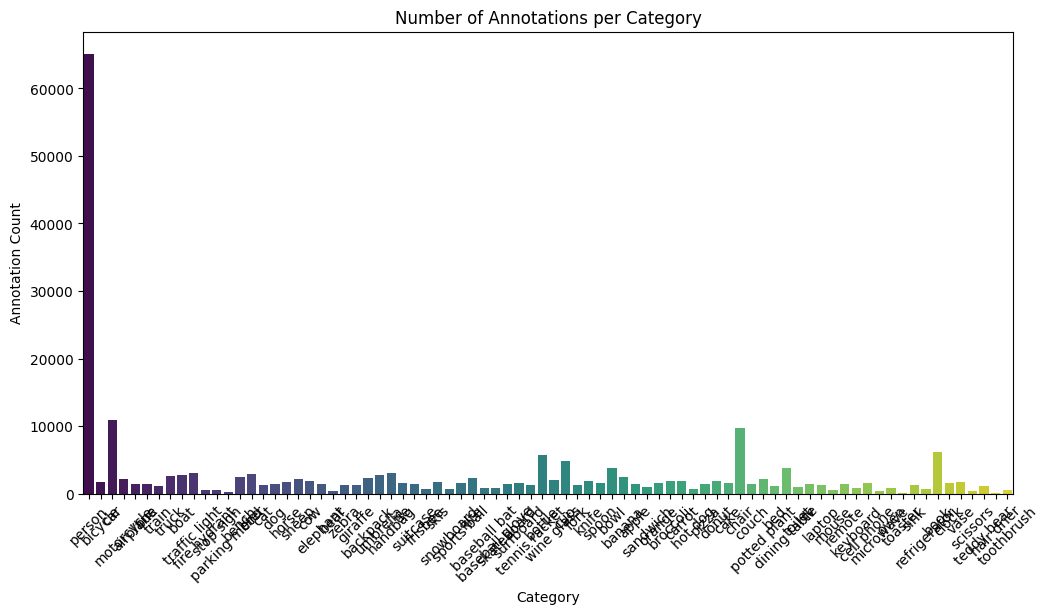

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get category details
categories = coco.loadCats(coco.getCatIds())
category_names = [cat['name'] for cat in categories]
category_ids = [cat['id'] for cat in categories]

# Count annotations per category
annotations_per_category = [len(coco.getAnnIds(catIds=cat_id)) for cat_id in category_ids]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=category_names, y=annotations_per_category, palette="viridis")
plt.xticks(rotation=45)
plt.title("Number of Annotations per Category")
plt.xlabel("Category")
plt.ylabel("Annotation Count")
plt.show()


Annotations per Image

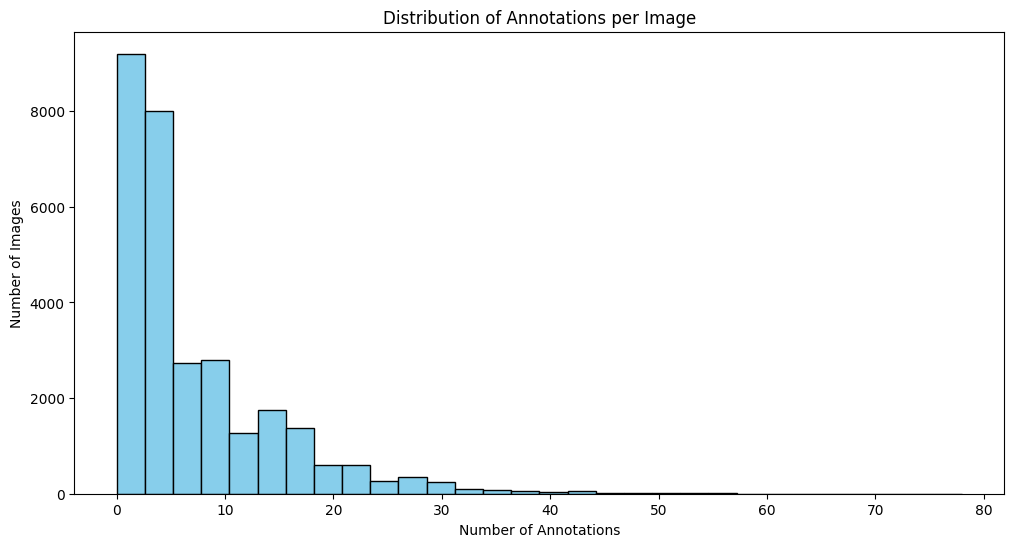

In [6]:
# Get image details
image_ids = coco.getImgIds()
annotations_per_image = [len(coco.getAnnIds(imgIds=img_id)) for img_id in image_ids]

# Plot
plt.figure(figsize=(12, 6))
plt.hist(annotations_per_image, bins=30, color="skyblue", edgecolor="black")
plt.title("Distribution of Annotations per Image")
plt.xlabel("Number of Annotations")
plt.ylabel("Number of Images")
plt.show()


Visualize Sample Images with Annotations

Image Path: E:\Internships\Infosys Springboard\coco2017_subset\train2017\000000522418.jpg
File Name: 000000522418.jpg


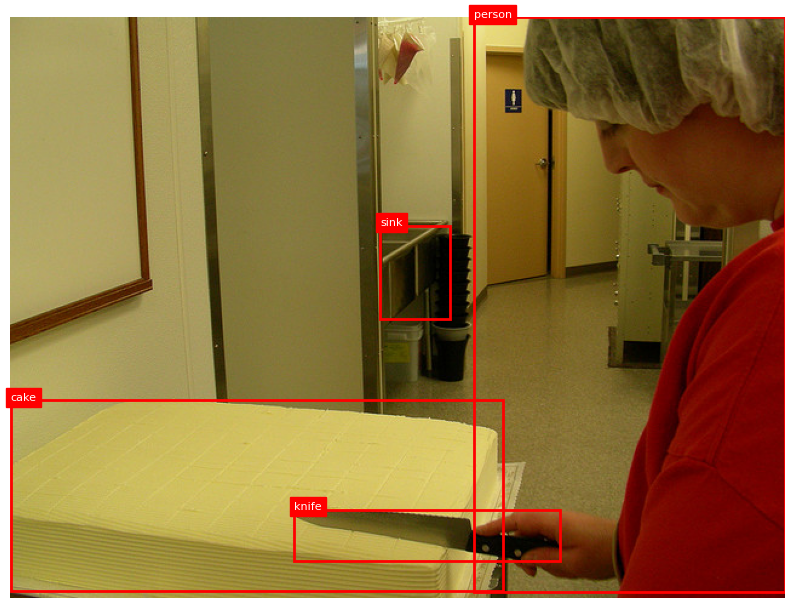

In [7]:
def display_image_with_annotations(image_id):
    # Load image metadata
    img_info = coco.loadImgs(image_id)[0]
    img_path = os.path.join(IMAGE_FOLDER, img_info['file_name'])

    # Debug: Print the image path
    print("Image Path:", img_path)
    print("File Name:", img_info['file_name'])

    # Read the image
    img = cv2.imread(img_path)
    if img is None:
        raise FileNotFoundError(f"Image not found at {img_path}")

    # Convert image color
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Load annotations
    annotation_ids = coco.getAnnIds(imgIds=image_id)
    annotations = coco.loadAnns(annotation_ids)

    # Display the image
    plt.figure(figsize=(10, 8))
    plt.imshow(img)
    plt.axis('off')

    # Add bounding boxes
    ax = plt.gca()
    for ann in annotations:
        bbox = ann['bbox']
        x, y, width, height = bbox
        rect = patches.Rectangle((x, y), width, height, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        # Add category name
        cat = coco.loadCats(ann['category_id'])[0]['name']
        plt.text(x, y, cat, color='white', backgroundcolor='red', fontsize=8)

    plt.show()

# Test the function
sample_image_id = image_ids[0]  # Replace with any valid image ID
display_image_with_annotations(sample_image_id)


Create Output Folder

In [8]:
OUTPUT_FOLDER = r"E:\Internships\IS\resized_images"
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

Resize Function

In [9]:
def resize_and_save_images(image_ids, target_size=(300, 300)):
    for image_id in image_ids:
        img_info = coco.loadImgs(image_id)[0]
        img_path = os.path.join(IMAGE_FOLDER, img_info['file_name'])
        img = cv2.imread(img_path)

        if img is not None:
            # Resize image
            resized_img = cv2.resize(img, target_size)

            # Save resized image
            output_path = os.path.join(OUTPUT_FOLDER, img_info['file_name'])
            cv2.imwrite(output_path, resized_img)
            print(f"Resized and saved: {output_path}")
        else:
            print(f"Image not found: {img_path}")


Run the Resizing Process

In [11]:
resize_and_save_images(image_ids, target_size=(300, 300))

Resized and saved: E:\Internships\IS\resized_images\000000522418.jpg
Resized and saved: E:\Internships\IS\resized_images\000000554625.jpg
Resized and saved: E:\Internships\IS\resized_images\000000309022.jpg
Resized and saved: E:\Internships\IS\resized_images\000000193271.jpg
Resized and saved: E:\Internships\IS\resized_images\000000224736.jpg
Resized and saved: E:\Internships\IS\resized_images\000000223648.jpg
Resized and saved: E:\Internships\IS\resized_images\000000113588.jpg
Resized and saved: E:\Internships\IS\resized_images\000000384553.jpg
Resized and saved: E:\Internships\IS\resized_images\000000368402.jpg
Resized and saved: E:\Internships\IS\resized_images\000000542145.jpg
Resized and saved: E:\Internships\IS\resized_images\000000540186.jpg
Resized and saved: E:\Internships\IS\resized_images\000000051191.jpg
Resized and saved: E:\Internships\IS\resized_images\000000324266.jpg
Resized and saved: E:\Internships\IS\resized_images\000000262284.jpg
Resized and saved: E:\Internships\